<!-- # Preprocessing -->
# imports

In [1]:
import pandas as pd
import numpy as np
import sqlite3
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectPercentile, SelectKBest
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from datetime import datetime,timedelta
connection_post = sqlite3.connect('cruise_post.db')
connection_pre = sqlite3.connect('cruise_pre.db')
df_pre = pd.read_sql_query("SELECT * FROM cruise_pre",connection_pre,index_col="index")
df_post = pd.read_sql_query("SELECT * FROM cruise_post",connection_post,index_col="index")
connection_post.close()
connection_pre.close()

# Basic information and statistics

information such as data size, features to be compared to the assessment questions documents' feature descriptions.
common statistics to see the numerical features' data overall patterns  

In [2]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133746 entries, 0 to 133745
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Gender                                      120290 non-null  object 
 1   Date of Birth                               119062 non-null  object 
 2   Source of Traffic                           133746 non-null  object 
 3   Onboard Wifi Service                        114254 non-null  object 
 4   Embarkation/Disembarkation time convenient  118103 non-null  float64
 5   Ease of Online booking                      115391 non-null  float64
 6   Gate location                               116606 non-null  float64
 7   Logging                                     133746 non-null  object 
 8   Onboard Dining Service                      116937 non-null  object 
 9   Online Check-in                             118059 non-null  float64
 

In [3]:
df_post.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133746 entries, 0 to 133745
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Cruise Name      117815 non-null  object 
 1   Ticket Type      113685 non-null  object 
 2   Cruise Distance  119260 non-null  object 
 3   Ext_Intcode      133746 non-null  object 
 4   WiFi             64012 non-null   float64
 5   Dining           133746 non-null  int64  
 6   Entertainment    73689 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 8.2+ MB


In [4]:
df_pre.describe()

Embarkation/Disembarkation time convenient  Ease of Online booking  \
count                               118103.000000           115391.000000   
mean                                     3.055850                2.758170   
std                                      1.526012                1.401888   
min                                      0.000000                0.000000   
25%                                      2.000000                2.000000   
50%                                      3.000000                3.000000   
75%                                      4.000000                4.000000   
max                                      5.000000                5.000000   

       Gate location  Online Check-in  Cabin Comfort  Cabin service  \
count  116606.000000    118059.000000  113494.000000  119914.000000   
mean        2.978526         3.249884       3.439574       3.383925   
std         1.277984         1.350811       1.321604       1.287508   
min         0.000000         0.000000       0.000000       0.000000   
25%         2.000000         2.000000       2.000000       2.000000   
50%         3.000000         3.000000       4.000000       4.000000   
75%         4.000000         4.000000       5.000000       4.000000   
max         5.000000         5.000000       5.000000       5.000000   

       Baggage handling  Port Check-in Service  Onboard Service    Cleanliness  
count     113453.000000          119399.000000    115419.000000  115344.000000  
mean           3.633416               3.308470         3.641844       3.285745  
std            1.178899               1.266476         1.177988       1.313328  
min            1.000000               1.000000         0.000000       0.000000  
25%            3.000000               3.000000         3.000000       2.000000  
50%            4.000000               3.000000         4.000000       3.000000  
75%            5.000000               4.000000         5.000000       4.000000  
max            5.000000               5.000000         5.000000       5.000000

In [5]:
df_post.describe()

WiFi         Dining  Entertainment
count  64012.000000  133746.000000   73689.000000
mean       0.500578       0.499290       0.503142
std        0.500004       0.500001       0.499994
min        0.000000       0.000000       0.000000
25%        0.000000       0.000000       0.000000
50%        1.000000       0.000000       1.000000
75%        1.000000       1.000000       1.000000
max        1.000000       1.000000       1.000000

In [6]:
df_pre.sample(10)

Gender Date of Birth         Source of Traffic  Onboard Wifi Service  \
index                                                                          
63052     None    13/03/2008  Direct - Company Website    Somewhat important   
103253  Female    15/12/1974  Direct - Email Marketing    A little important   
55191     Male    08/07/1999  Direct - Company Website                  None   
108199  Female    19/05/1971  Direct - Email Marketing  Not at all important   
66398     Male          None   Indirect - Social Media  Not at all important   
99675   Female    28/02/1999  Direct - Company Website    A little important   
103230    Male    24/10/1963  Direct - Company Website        Very important   
91181     None    19/05/1963  Direct - Company Website                  None   
133358  Female    21/08/1994  Direct - Company Website                  None   
742       Male    22/08/1984  Direct - Email Marketing   Extremely important   

        Embarkation/Disembarkation time convenient  Ease of Online booking  \
index                                                                        
63052                                          NaN                     4.0   
103253                                         5.0                     5.0   
55191                                          3.0                     2.0   
108199                                         1.0                     NaN   
66398                                          NaN                     2.0   
99675                                          NaN                     3.0   
103230                                         5.0                     4.0   
91181                                          1.0                     4.0   
133358                                         4.0                     2.0   
742                                            2.0                     NaN   

        Gate location           Logging Onboard Dining Service  \
index                                                            
63052             3.0   25/04/2023 9:48     Somewhat important   
103253            5.0  07/07/2023 20:48                   None   
55191             NaN   11/04/2023 3:03         Very important   
108199            1.0  16/07/2023 15:09                   None   
66398             3.0   01/05/2023 9:06     A little important   
99675             2.0   01/07/2023 6:42         Very important   
103230            2.0  07/07/2023 19:58     A little important   
91181             1.0  15/06/2023 22:08                   None   
133358            3.0   31/08/2023 5:17         Very important   
742               NaN   02/01/2023 8:31                   None   

        Online Check-in  Cabin Comfort Onboard Entertainment  Cabin service  \
index                                                                         
63052               3.0            3.0    Somewhat important            3.0   
103253              4.0            4.0    A little important            2.0   
55191               2.0            4.0        Very important            4.0   
108199              NaN            4.0   Extremely important            5.0   
66398               5.0            5.0    Somewhat important            4.0   
99675               4.0            4.0        Very important            NaN   
103230              4.0            1.0    A little important            3.0   
91181               3.0            3.0    A little important            2.0   
133358              2.0            NaN        Very important            1.0   
742                 5.0            5.0   Extremely important            2.0   

        Baggage handling  Port Check-in Service  Onboard Service  Cleanliness  \
index                                                                           
63052                4.0                    NaN              NaN          3.0   
103253               2.0                    2.0              2.0          1.0   
55191                4.0                    

In [7]:
df_post.sample(10)

Cruise Name Ticket Type Cruise Distance  Ext_Intcode  WiFi  Dining  \
index                                                                       
19619          lap        None            None  BL308KHBVJT   NaN       1   
78816         None    Standard          223 KM  LB943XJWGIV   NaN       0   
131257   Blastoise      Deluxe          861 KM  LB876SCMSRJ   NaN       0   
83497    Blastoise      Luxury         3217 KM  LB516PNPSRJ   1.0       1   
85247    Blastoise      Luxury          584 KM  BL620YEIHDA   0.0       1   
133621   Blastoise      Luxury       258 Miles  LB776QDLCBM   1.0       1   
25781       Lapras    Standard          544 KM  BL423TXILIB   NaN       0   
118149      Lapras    Standard          587 KM  LB185EBTVFJ   NaN       0   
122410      Lapras        None          746 KM  LB293OTBMPG   NaN       1   
111621   blastoise        None         2042 KM  LB589KSIGMT   0.0       1   

        Entertainment  
index                  
19619             NaN  
78816             NaN  
131257            1.0  
83497             0.0  
85247             1.0  
133621            1.0  
25781             NaN  
118149            NaN  
122410            NaN  
111621            0.0

### Findings

There are many nans in the data set. Both dfs are of the same size.  
There are some feature engineering opportunities from categorial data to numerical.   
Especially those from importance scale.  

# Visualisation of missing values

Matrix plot to find pattern of missingness in the datasets.  
  
Bar chart to visualise how many missing values in each column of the datasets.  
  
Heat map shows the correlations between every 2 columns.
  
### `df_pre`

<AxesSubplot:>

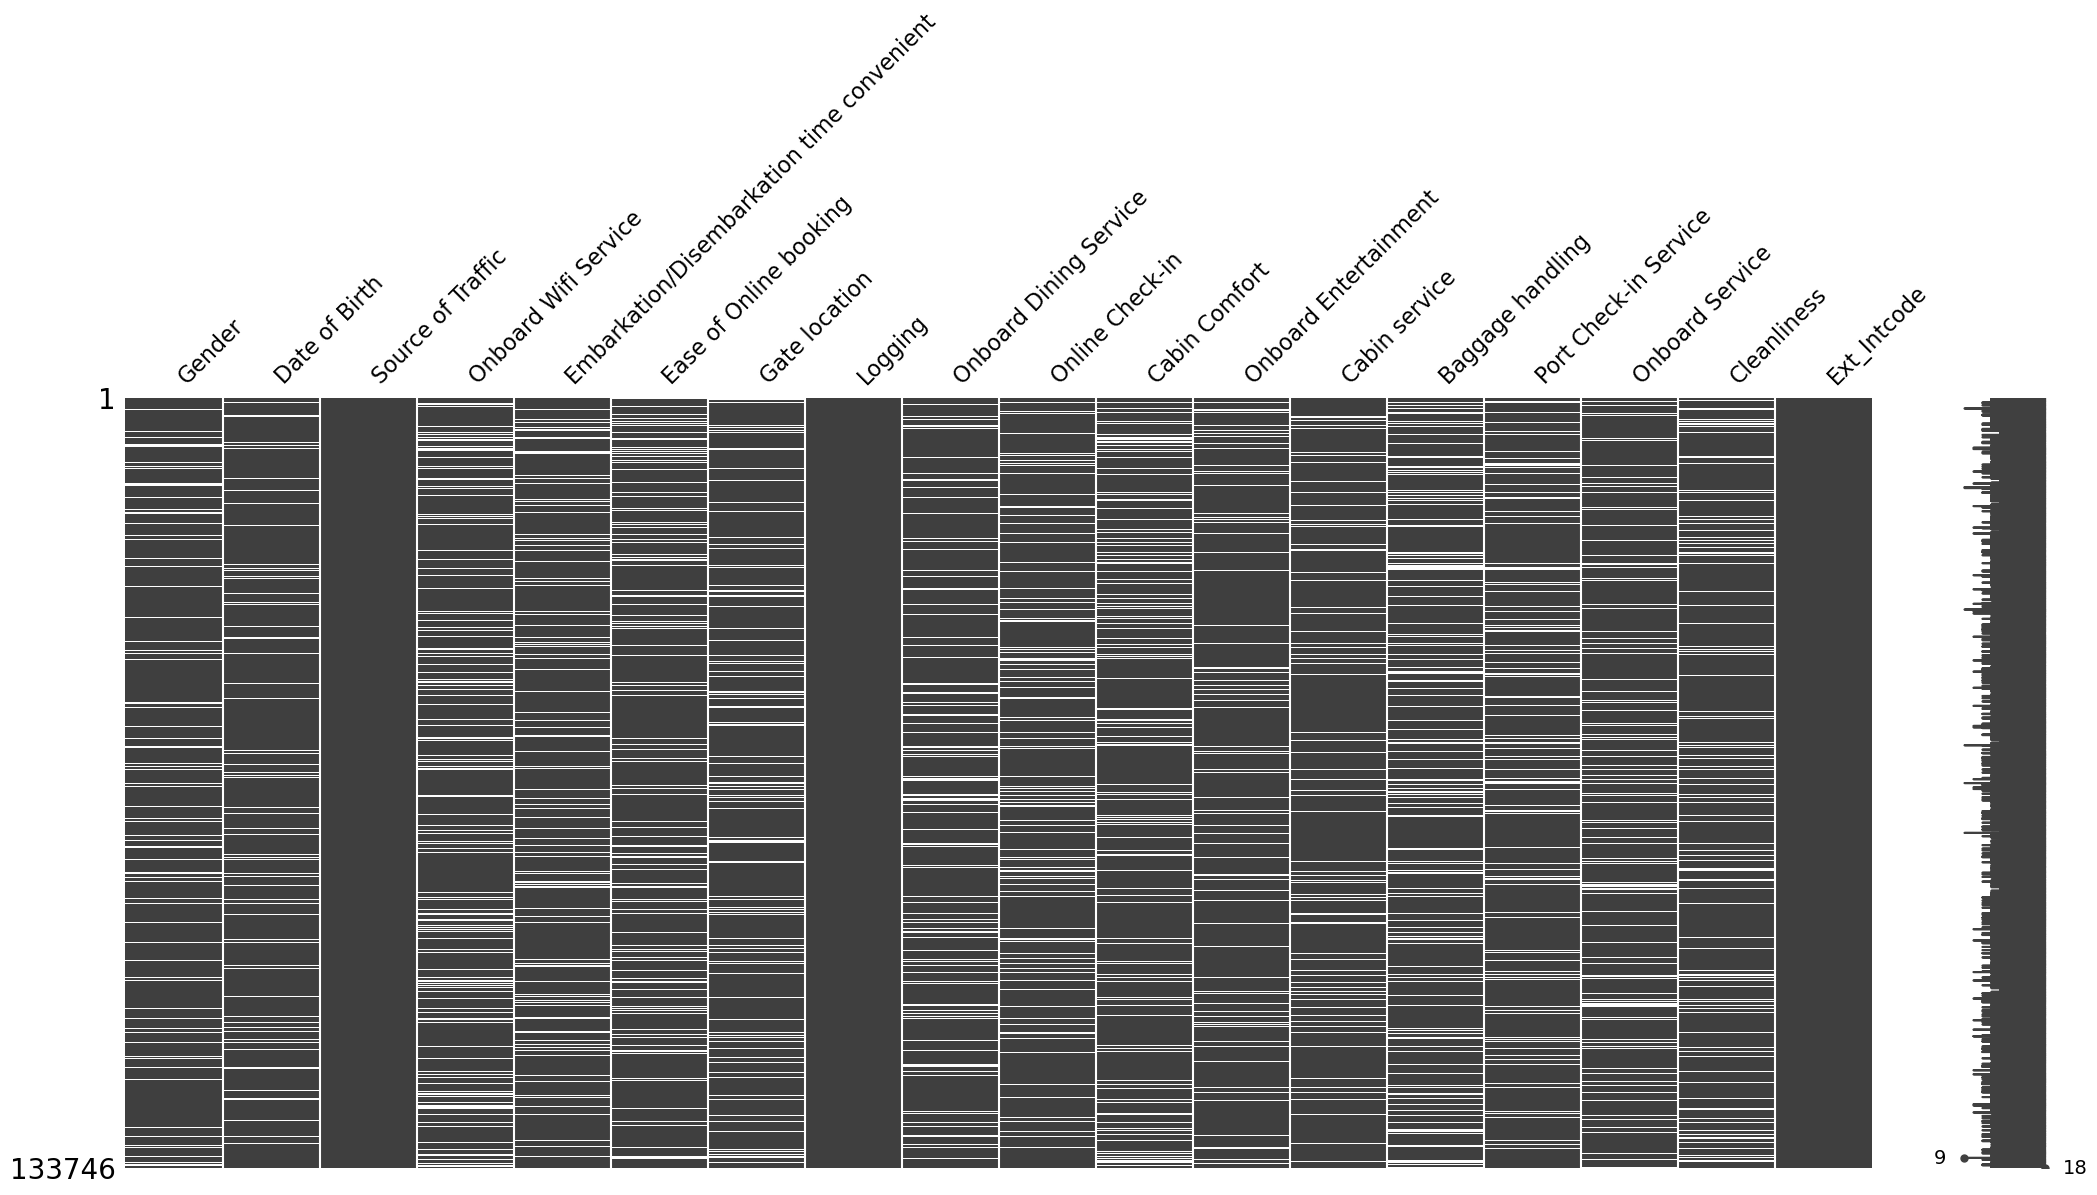

In [8]:
msno.matrix(df_pre)

<AxesSubplot:>

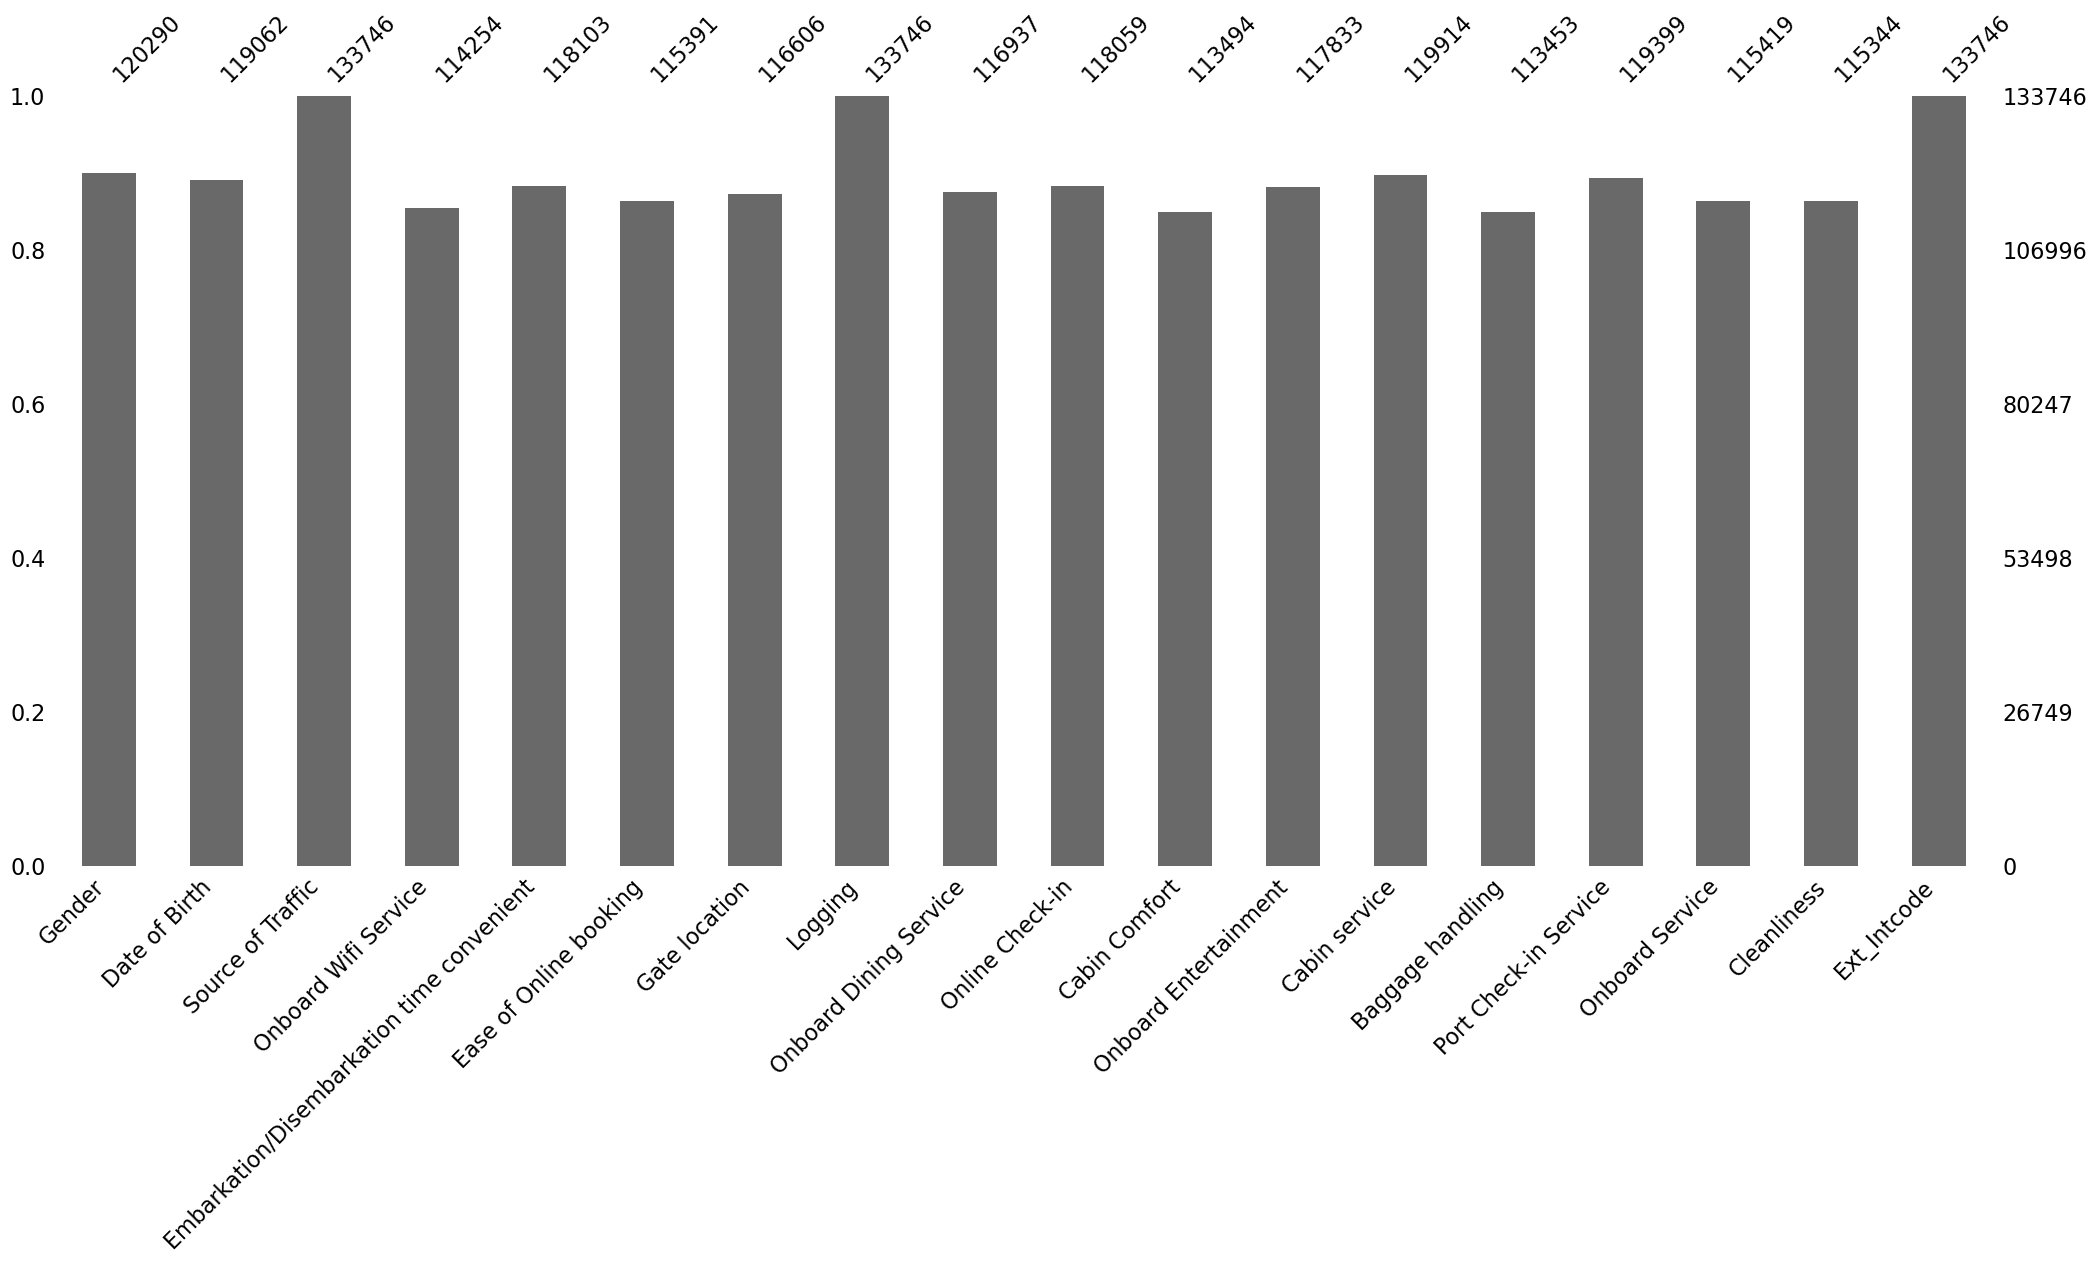

In [9]:
msno.bar(df_pre)

<AxesSubplot:>

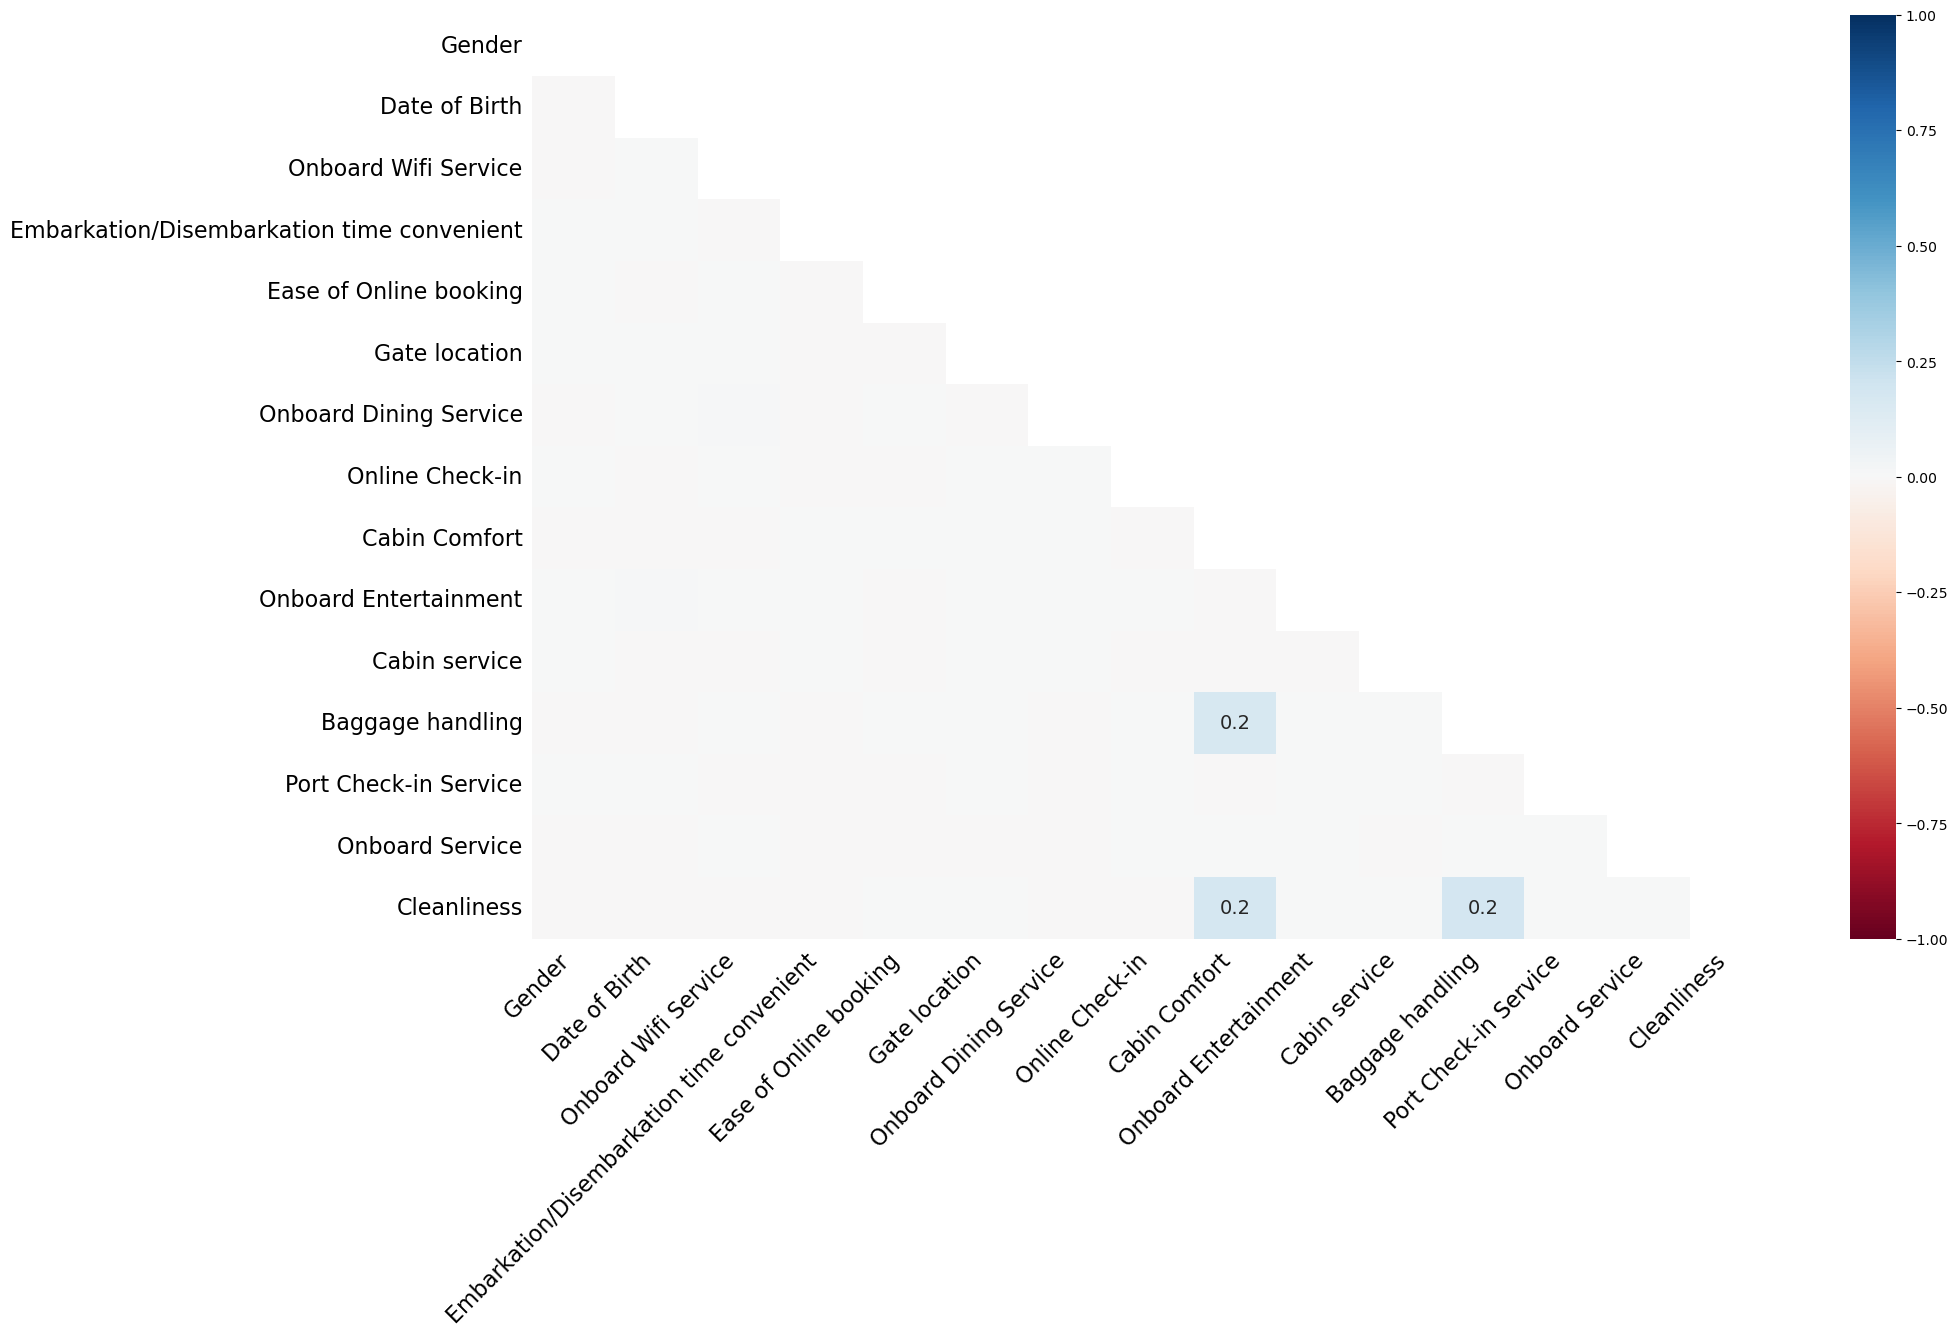

In [10]:
msno.heatmap(df_pre)

### `df_post`

<AxesSubplot:>

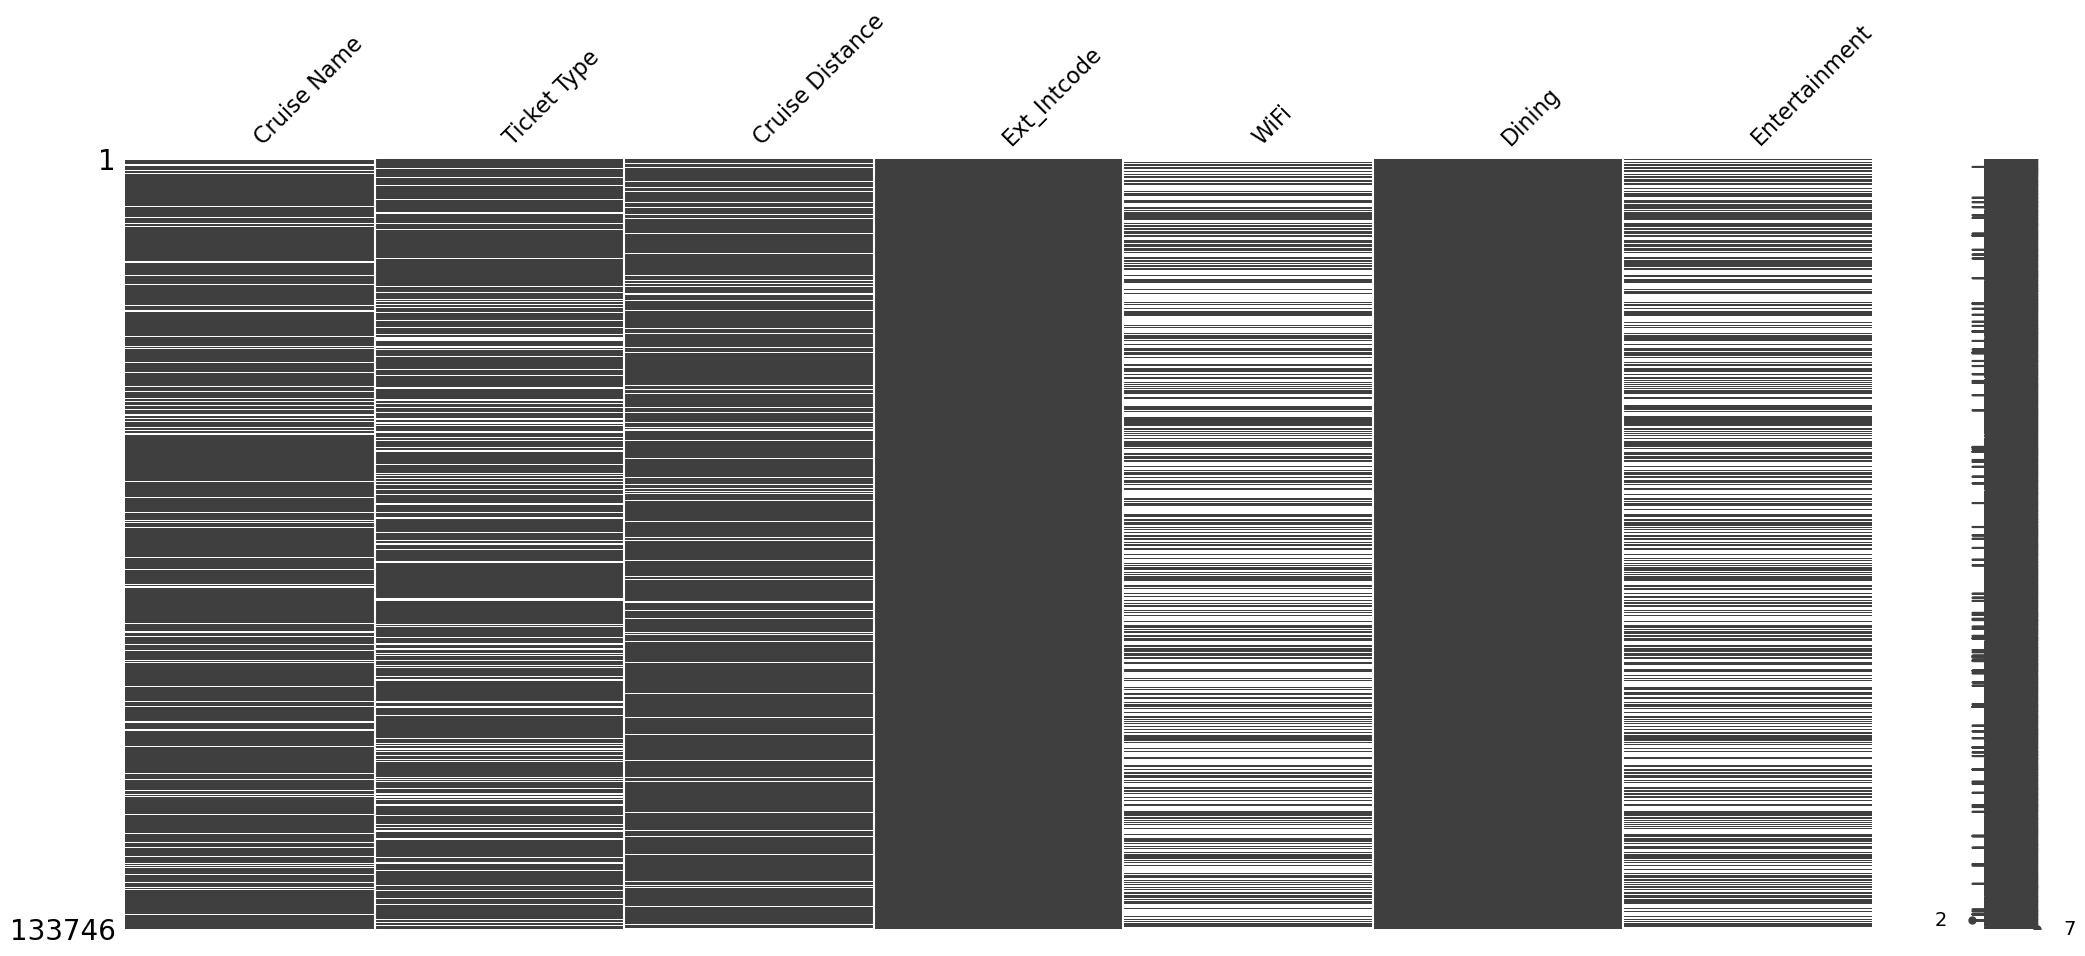

In [11]:
msno.matrix(df_post)

In [12]:
df_post.WiFi.unique()

array([ 1., nan,  0.])

<AxesSubplot:>

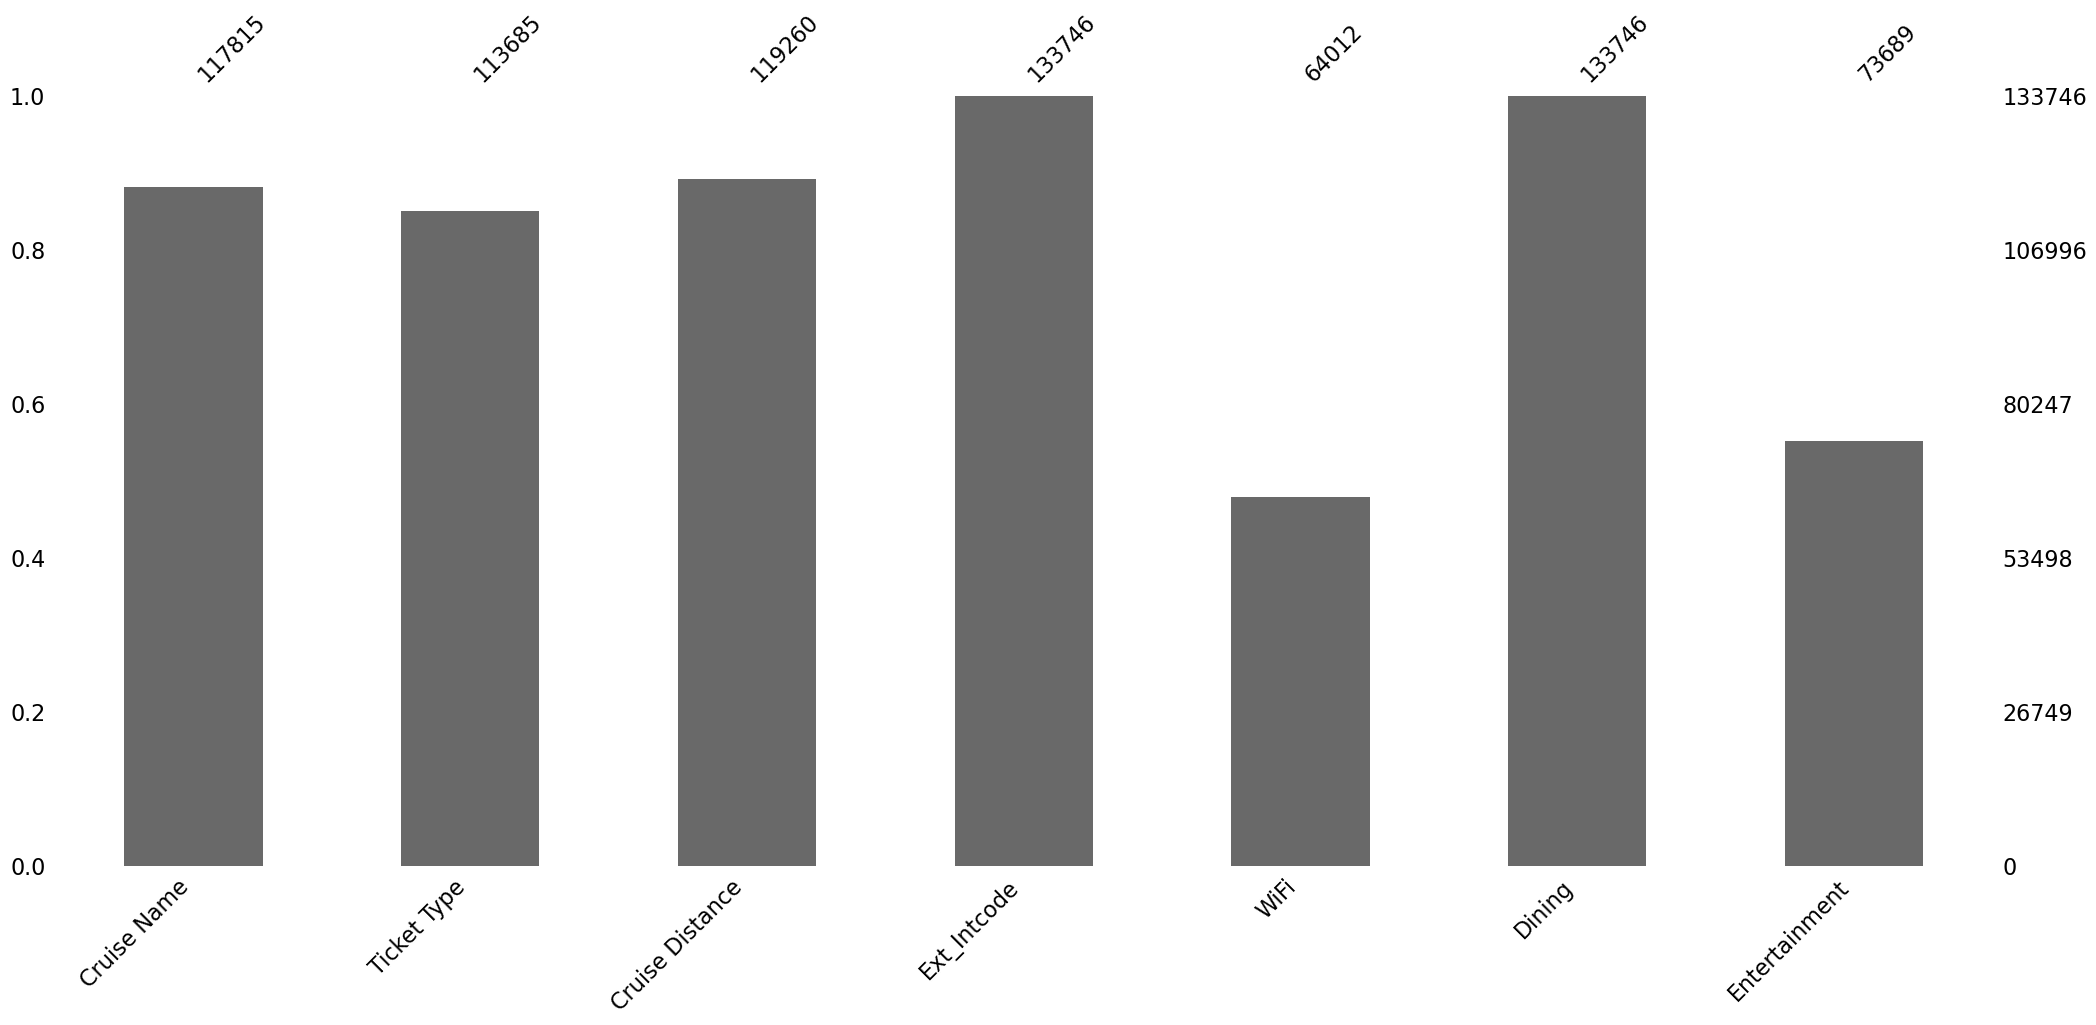

In [13]:
msno.bar(df_post)

<AxesSubplot:>

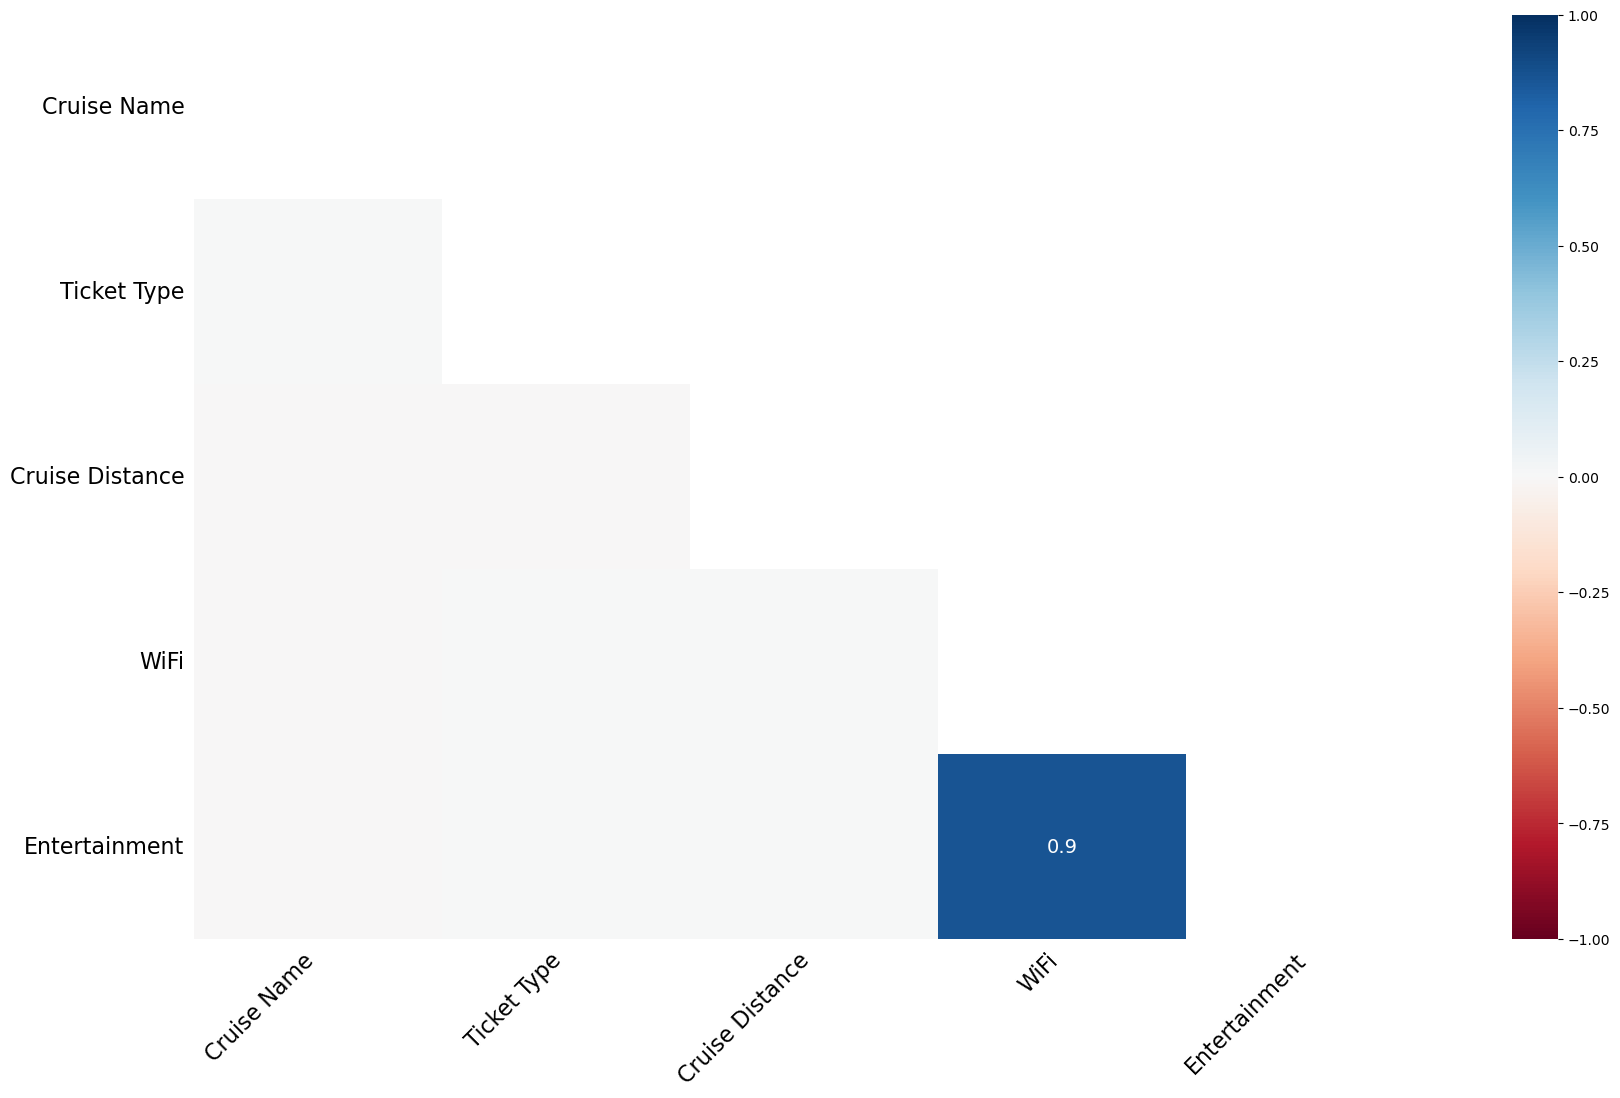

In [14]:
msno.heatmap(df_post)

### Findings

Not much dependence between occurence of missing values in `df_pre`.  
For `df_post`, also not much dependence except for `WiFi` and `Entertainment` with the value of `0.9`in the heatmap.    
The data in `df_pre` and `df_post` seesm to indicate more towards Missing At Random. They are not completely missing at random though as the heat map indicates some correlations  

source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3668100/
 
These nans should require imputation as according to the assessment question document, customers are required to answer these questions without leaving them blank.

# Renaming  
  
For a more consistent feature naming scheme easier to use through dot operator and autocomplete

In [15]:
internal_passanger_code_text = "internal_passanger_code"

In [16]:
df_pre.rename({"Ext_Intcode":internal_passanger_code_text},axis=1,inplace=True)
df_post.rename({"Ext_Intcode":internal_passanger_code_text},axis=1,inplace=True)

def replace_spaces(x):
    return x.replace(" ","_").strip().lower()
  
df_pre.rename(replace_spaces,axis=1,inplace=True)
df_post.rename(replace_spaces,axis=1,inplace=True)

df_pre.columns

Index(['gender', 'date_of_birth', 'source_of_traffic', 'onboard_wifi_service',
       'embarkation/disembarkation_time_convenient', 'ease_of_online_booking',
       'gate_location', 'logging', 'onboard_dining_service', 'online_check-in',
       'cabin_comfort', 'onboard_entertainment', 'cabin_service',
       'baggage_handling', 'port_check-in_service', 'onboard_service',
       'cleanliness', 'internal_passanger_code'],
      dtype='object')

In [17]:
df_post.columns

Index(['cruise_name', 'ticket_type', 'cruise_distance',
       'internal_passanger_code', 'wifi', 'dining', 'entertainment'],
      dtype='object')

# Feature Engineering of Splitting and combining rows to remove duplicates

Since since there is no mentioned of unique passanger code required, I will split them to investigate
Does post trip data also have vouchers and upgrades available just like the the pre trip data? I assume there will be not.

In [18]:
df_pre_2_duplicated = df_pre.groupby(internal_passanger_code_text).size()[lambda x: x>1]
df_pre_2_duplicated.unique()

array([2])

In [19]:
df_post_2_duplicated = df_post.groupby(internal_passanger_code_text).size()[lambda x: x>1]
df_post_2_duplicated.unique()

array([2])

In [20]:
df_pre.duplicated(internal_passanger_code_text).any()

True

In [21]:
df_post.duplicated(internal_passanger_code_text).any()

True

for both cases, the max is two entries per passanger code

In [22]:
(df_pre_2_duplicated.index == df_post_2_duplicated.index).all()

True

curious one to one correspondence

In [23]:
df_pre_2_duplicated = df_pre[lambda x: x.internal_passanger_code.isin(df_pre_2_duplicated.index)]
df_post_2_duplicated = df_post[lambda x: x.internal_passanger_code.isin(df_post_2_duplicated.index)]
temp = df_post_2_duplicated.drop([internal_passanger_code_text],axis=1)
df_2_duplicated = pd.concat([df_pre_2_duplicated,temp],axis=1)
df_split_1 = df_2_duplicated.drop_duplicates(internal_passanger_code_text,keep='first',ignore_index=True)
df_split_2 = df_2_duplicated.drop_duplicates(internal_passanger_code_text,keep='last',ignore_index=True)

comparision =df_split_1.compare(df_split_2)
comparision.head(10)

logging                  cabin_comfort       baggage_handling  \
              self            other          self other             self   
0  01/01/2023 0:06  01/01/2023 0:11           NaN   1.0              NaN   
1  01/01/2023 0:21  01/01/2023 0:26           NaN   5.0              NaN   
2  01/01/2023 1:05  01/01/2023 1:10           NaN   NaN              NaN   
3  01/01/2023 1:14  01/01/2023 1:19           NaN   4.0              NaN   
4  01/01/2023 1:32  01/01/2023 1:37           NaN   1.0              NaN   
5  01/01/2023 1:43  01/01/2023 1:48           NaN   5.0              NaN   
6  01/01/2023 3:43  01/01/2023 3:48           NaN   3.0              NaN   
7  01/01/2023 6:28  01/01/2023 6:33           NaN   4.0              NaN   
8  01/01/2023 7:42  01/01/2023 7:47           NaN   5.0              NaN   
9  01/01/2023 7:44  01/01/2023 7:49           NaN   4.0              NaN   

        cleanliness       ticket_type          
  other        self other        self   other  
0   3.0         NaN   1.0         NaN     NaN  
1   4.0         NaN   5.0         NaN     NaN  
2   4.0         NaN   5.0         NaN     NaN  
3   4.0         NaN   4.0         NaN     NaN  
4   2.0         NaN   1.0    Standard    None  
5   1.0         NaN   5.0         NaN     NaN  
6   NaN         NaN   5.0         NaN     NaN  
7   NaN         NaN   4.0         NaN     NaN  
8   3.0         NaN   5.0         NaN     NaN  
9   4.0         NaN   4.0        None  Luxury

In [24]:
df_split_1.compare(df_split_2).count()

logging           self     3896
                  other    3896
cabin_comfort     self        0
                  other    3423
baggage_handling  self        0
                  other    3416
cleanliness       self        0
                  other    3480
ticket_type       self      479
                  other     546
dtype: int64

In [25]:
comparision.ticket_type = comparision.ticket_type.fillna("")

In [26]:
df_split_2.loc[:,"ticket_type"] = comparision.ticket_type.self + comparision.ticket_type.other
df_split_2.ticket_type.unique()

/tmp/ipykernel_363799/150239904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_split_2.loc[:,"ticket_type"] = comparision.ticket_type.self + comparision.ticket_type.other


array(['', 'Standard', 'Luxury', 'Deluxe'], dtype=object)

Selecting df_split_2

I am combining df_post and df_pre data that has no repeated `internal_passanger_code`

In [27]:
post_single_code= df_post[lambda x: ~x.internal_passanger_code.isin(df_split_2.internal_passanger_code)].drop(internal_passanger_code_text,axis=True)
pre_single_code= df_pre[lambda x: ~x.internal_passanger_code.isin(df_split_2.internal_passanger_code)]
print((pre_single_code.index == post_single_code.index).all())
df_single_code = pd.concat([pre_single_code,post_single_code],axis=1)  

df = pd.concat([df_split_2,df_single_code],ignore_index=True)

True


Some have about 30 days difference

### Findings

There are repeated `internal_passanger_code`, After spliting the duplicates up into different dataframes and comparing them, I am selecting `df_split_2` on the most part.  

With the exception of `ticket_type` as some have categories and some don't, using the help of compare(). I combined the both dataframe's `ticket_type` into one.


# Splitting into features and target

`ticket_type` is the target and some `tick_type` data with  `nan`s or empty strings are dropped because it is not possible to impute such data. 

In [28]:
(df.ticket_type == "").any() or df.ticket_type.isna().any()

True

In [29]:
df.ticket_type.unique()

array(['', 'Standard', 'Luxury', 'Deluxe', None], dtype=object)

In [30]:
df = df[~df.ticket_type.isna() & ~(df.ticket_type == "")]
df.ticket_type.isna().any() or (df.ticket_type == "").any()

False

In [31]:
# temp = df_post.drop([internal_passanger_code_text]
# df = pd.concat([df_pre,temp],axis=1,)
df_x = df.drop(["ticket_type"],axis =1)
df_x.set_index(internal_passanger_code_text,drop=True,inplace=True)

df_y = df.ticket_type

In [32]:
df_x.head()

gender date_of_birth         source_of_traffic  \
internal_passanger_code                                                   
LB325CKADFV                Male    15/11/1987   Indirect - Social Media   
LB408SLCDQB                Male    14/06/1962  Direct - Email Marketing   
LB525KQZVEE                Male    19/06/2010  Direct - Email Marketing   
LB536JGQUWI                None    18/11/1995  Direct - Email Marketing   
BL653TIKHKA              Female    02/09/1979  Direct - Company Website   

                         onboard_wifi_service  \
internal_passanger_code                         
LB325CKADFV              Not at all important   
LB408SLCDQB               Extremely important   
LB525KQZVEE                              None   
LB536JGQUWI                Somewhat important   
BL653TIKHKA                Somewhat important   

                         embarkation/disembarkation_time_convenient  \
internal_passanger_code                                               
LB325CKADFV                                                     1.0   
LB408SLCDQB                                                     5.0   
LB525KQZVEE                                                     5.0   
LB536JGQUWI                                                     3.0   
BL653TIKHKA                                                     NaN   

                         ease_of_online_booking  gate_location  \
internal_passanger_code                                          
LB325CKADFV                                 1.0            2.0   
LB408SLCDQB                                 4.0            5.0   
LB525KQZVEE                                 NaN            4.0   
LB536JGQUWI                                 3.0            3.0   
BL653TIKHKA                                 5.0            3.0   

                                  logging onboard_dining_service  \
internal_passanger_code                                            
LB325CKADFV               01/01/2023 1:37   Not at all important   
LB408SLCDQB               01/01/2023 7:49         Very important   
LB525KQZVEE              01/01/2023 14:35     A little important   
LB536JGQUWI              01/01/2023 23:54    Extremely important   
BL653TIKHKA              02/01/2023 14:10     Somewhat important   

                         online_check-in  ...  cabin_service baggage_handling  \
internal_passanger_code                   ...                                   
LB325CKADFV                          1.0  ...            5.0              2.0   
LB408SLCDQB                          5.0  ...            4.0              4.0   
LB525KQZVEE                          2.0  ...            4.0              4.0   
LB536JGQUWI                          5.0  ...            4.0              4.0   
BL653TIKHKA                          5.0  ...            4.0              4.0   

                         port_check-in_service  onboard_service  cleanliness  \
internal_passanger_code                                                        
LB325CKADFV                                5.0              NaN          1.0   
LB408SLCDQB                                4.0              4.0          4.0   
LB525KQZVEE                                3.0              4.0          2.0   
LB536JGQUWI                                5.0              5.0          5.0   
BL653TIKHKA                                5.0              4.0          5.0   

                         cruise_name  cruise_distance wifi dining  \
internal_passanger_code                                             
LB325CKADFV                Blastoise           956 KM  NaN      1   
LB408SLCDQB                Blastoise          2349 KM  1.0      0   
LB525KQZVEE                   Lapras          1788 KM  NaN      0   
LB536JGQUWI                Blastoise           486 KM  1.0      0   
BL653TIKHKA                     None          1464 KM  1.0      0   

                         entertainment  
internal_passanger_code                 
LB325CKADFV           

In [33]:
df_x.columns

Index(['gender', 'date_of_birth', 'source_of_traffic', 'onboard_wifi_service',
       'embarkation/disembarkation_time_convenient', 'ease_of_online_booking',
       'gate_location', 'logging', 'onboard_dining_service', 'online_check-in',
       'cabin_comfort', 'onboard_entertainment', 'cabin_service',
       'baggage_handling', 'port_check-in_service', 'onboard_service',
       'cleanliness', 'cruise_name', 'cruise_distance', 'wifi', 'dining',
       'entertainment'],
      dtype='object')

# Feature Engineering of `cruise_distance`

It was in "xx km", i should only extract the first split

In [34]:
df_x.cruise_distance = df_x.cruise_distance.str.split(" ").str[0]

In [35]:
# df_x["cruise_distance"] = df_x.cruise_distance.astype(int)

# Feature Engineering of `date_of_birth` to `age` with the type of `int`

Easier to compare with each other through age demographic.

In [36]:
df.date_of_birth.isna().any()

True

In [37]:
df.date_of_birth.sample(10)

49945     11/08/1980
128878          None
18700     11/04/1987
103490    26/09/1982
25925     25/01/1966
18291     27/11/2006
65734     15/05/1992
91714     05/11/1975
129457    16/07/2005
34686     23/07/1963
Name: date_of_birth, dtype: object

In [38]:

df_x["temp_1"] = pd.to_datetime(df_x.date_of_birth,format="%Y-%m-%d",errors='coerce')
df_x["temp_2"] = pd.to_datetime(df_x.date_of_birth,format="%d/%m/%Y",errors='coerce')
df_x["date_of_birth"] = df_x.temp_1.fillna(df_x.temp_2)
df_x.drop(["temp_1","temp_2"],axis=1,inplace=True)
# https://stackoverflow.com/questions/60390709/working-with-mixed-datetime-formats-in-pandas


def age(born):
    if str(born) == "NaT": 
        return born
    born = datetime.strptime(str(born), "%Y-%m-%d %H:%M:%S").date()
    today = datetime.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
df_x["age"] = df_x.date_of_birth.apply(age).fillna(0).astype(str).astype(int)
df_x.drop("date_of_birth",axis=1,inplace=True)

df_x.age.isna().any()

False

In [39]:
df.date_of_birth.sample(10)

44128     13/06/1979
19016     07/01/1997
104675    25/08/1969
68354     03/04/1997
105583    08/04/1973
1787      19/10/1999
6830      01/06/1968
127506    1812-04-22
90902     25/06/1969
127645    12/12/2010
Name: date_of_birth, dtype: object

In [40]:
df_x.age.sample(10)

internal_passanger_code
LB863KLPDXH     25
LB937ELIZWG     22
LB116PIWQHP      0
BL565FAWPCI     62
BL445JPCGEL     45
BL266XQOSWX     29
BL936GVEHFI    163
BL597KBCXZH     20
LB526TKOOQB     20
BL535TMRQVM     24
Name: age, dtype: int64

# feature engineering for `logging`
  
For easier feature selection processing of `loggin`

In [41]:
df_x["logging"] = pd.to_datetime(df_x.logging).astype(int)

# Encoders and Nan imputation

[According to `scikit-learn`](https://scikit-learn.org/stable/modules/impute.html#multivariate-feature-imputation), they state that multiple imputation is an open problem on how useful it is compared  to simple imputation.`InterativeImputer` is still at the experimental stage and have know technical issues.

Unlike `SimpleImputer` which imputes with just a single value, `KNNIMputer` is more sophisticated as it impute based on surrounding data of a feature. It may be better. However `KNNImputer` is very slow on my machine so `SimpleImputer` is used instead.

<!-- A/B testing may still be needed in the ML pipeline to see which option is more optimal. -->

[I should not always use `OrdinalEncoder`, not all features has some sort of order, for example `gender` doesn't have this](https://stackoverflow.com/questions/69052776/ordinal-encoding-or-one-hot-encoding), so `ColumnTransformer` is used for this step.

`LabelEncoder` is meant for encoding labels/targets/y.

In [42]:
df_x[["wifi","entertainment"]]=df_x[["wifi","entertainment"]].fillna(-1)
df_x[["wifi","entertainment"]]

wifi  entertainment
internal_passanger_code                     
LB325CKADFV              -1.0           -1.0
LB408SLCDQB               1.0            1.0
LB525KQZVEE              -1.0            1.0
LB536JGQUWI               1.0            1.0
BL653TIKHKA               1.0            0.0
...                       ...            ...
LB147HGFXMK               0.0            0.0
LB569ACEIRB              -1.0           -1.0
BL862YWCXGQ              -1.0           -1.0
BL343MAXXIT               1.0            1.0
LB539JAJHXJ              -1.0           -1.0

[108113 rows x 2 columns]

In [43]:
ordinal_encoder_categories = [ 'onboard_wifi_service',
       'embarkation/disembarkation_time_convenient', 'ease_of_online_booking',
       'gate_location', 'onboard_dining_service', 'online_check-in',
       'cabin_comfort', 'onboard_entertainment', 'cabin_service',
       'baggage_handling', 'port_check-in_service', 'onboard_service',
       'cleanliness']
one_hot_encoder_categories = ["gender","source_of_traffic","cruise_name"]
# age,logging,cruise_distance,wifi,entertainment,dining

simple_imputer = SimpleImputer(strategy='median')
label_encoder = LabelEncoder()
column_transformer = ColumnTransformer(
[
    ('ordinal_encoder',OrdinalEncoder(),ordinal_encoder_categories),
    ('one_hot_encoder',OneHotEncoder(sparse=False),one_hot_encoder_categories),
], remainder='passthrough',
)
column_transformer.fit(df_x)
columns = column_transformer.get_feature_names_out()

df_x = pd.DataFrame( column_transformer.fit_transform(df_x),columns = columns)
df_x = simple_imputer.fit_transform(df_x)
df_y = label_encoder.fit_transform(df_y)

# Feature Selection

In order to understand what features are more important, I have used `SelectPercentile` to narrow down all features. `SelectKBest` can also feature select as well as `SelectPercentile`.

In [44]:
select_percentile = SelectPercentile(percentile=70)
df_x = select_percentile.fit_transform(df_x,df_y)
columns = [columns[a] for a in select_percentile.get_support(True)]
df_x = pd.DataFrame(df_x,columns=columns)

df_x.head()

ordinal_encoder__onboard_wifi_service  \
0                                    2.0   
1                                    1.0   
2                                    5.0   
3                                    3.0   
4                                    3.0   

   ordinal_encoder__embarkation/disembarkation_time_convenient  \
0                                                1.0             
1                                                5.0             
2                                                5.0             
3                                                3.0             
4                                                3.0             

   ordinal_encoder__ease_of_online_booking  ordinal_encoder__gate_location  \
0                                      1.0                             2.0   
1                                      4.0                             5.0   
2                                      3.0                             4.0   
3                                      3.0                             3.0   
4                                      5.0                             3.0   

   ordinal_encoder__online_check-in  ordinal_encoder__cabin_comfort  \
0                               1.0                             1.0   
1                               5.0                             4.0   
2                               2.0                             2.0   
3                               5.0                             5.0   
4                               5.0                             4.0   

   ordinal_encoder__onboard_entertainment  ordinal_encoder__cabin_service  \
0                                     2.0                             5.0   
1                                     4.0                             4.0   
2                                     0.0                             4.0   
3                                     1.0                             4.0   
4                                     4.0                             4.0   

   ordinal_encoder__baggage_handling  ordinal_encoder__port_check-in_service  \
0                                1.0                                     4.0   
1                                3.0                                     3.0   
2                                3.0                                     2.0   
3                                3.0                                     4.0   
4                                3.0                                     4.0   

   ...  one_hot_encoder__source_of_traffic_Direct - Company Website  \
0  ...                                                0.0             
1  ...                                                0.0             
2  ...                                                0.0             
3  ...                                                0.0             
4  ...                                                1.0             

   one_hot_encoder__source_of_traffic_Direct - Email Marketing  \
0                                                0.0             
1                                                1.0             
2                                                1.0             
3                                                1.0             
4                                                0.0             

   one_hot_encoder__source_of_traffic_Indirect - Search Engine  \
0                                                0.0             
1                                                0.0             
2                                                0.0             
3                                                0.0             
4                                                0.0             

   one_hot_encoder__source_of_traffic_Indirect - Social Media  \
0                                                1.0            
1                                                0.0            
2                                                0.0            
3                   

In [45]:
df_x.describe()

ordinal_encoder__onboard_wifi_service  \
count                          108113.000000   
mean                                2.454330   
std                                 1.722123   
min                                 0.000000   
25%                                 1.000000   
50%                                 3.000000   
75%                                 4.000000   
max                                 5.000000   

       ordinal_encoder__embarkation/disembarkation_time_convenient  \
count                                      108113.000000             
mean                                            3.050253             
std                                             1.434417             
min                                             0.000000             
25%                                             2.000000             
50%                                             3.000000             
75%                                             4.000000             
max                                             5.000000             

       ordinal_encoder__ease_of_online_booking  \
count                            108113.000000   
mean                                  2.788074   
std                                   1.304989   
min                                   0.000000   
25%                                   2.000000   
50%                                   3.000000   
75%                                   4.000000   
max                                   5.000000   

       ordinal_encoder__gate_location  ordinal_encoder__online_check-in  \
count                   108113.000000                     108113.000000   
mean                         2.981251                          3.219483   
std                          1.193375                          1.272419   
min                          0.000000                          0.000000   
25%                          2.000000                          2.000000   
50%                          3.000000                          3.000000   
75%                          4.000000                          4.000000   
max                          5.000000                          5.000000   

       ordinal_encoder__cabin_comfort  ordinal_encoder__onboard_entertainment  \
count                   108113.000000                           108113.000000   
mean                         3.508135                                2.506498   
std                          1.249194                                1.670067   
min                          0.000000                                0.000000   
25%                          3.000000                                1.000000   
50%                          4.000000                                3.000000   
75%                          4.000000                                4.000000   
max                          5.000000                                5.000000   

       ordinal_encoder__cabin_service  ordinal_encoder__baggage_handling  \
count                   108113.000000                      108113.000000   
mean                         3.447911                           2.678383   
std                          1.233065                           1.108446   
min                          0.000000                           0.000000   
25%                          3.000000                           2.000000   
50%                          4.000000                           3.000000   
75%                          4.000000                           3.000000   
max                          5.000000                           4.000000   

       ordinal_encoder__port_check-in_service  ...  \
count                           108113.000000  ...   
mean                                 2.271642  ...   
std                                  1.201999  ...   
min                                  0.000000  ...   
25%                                  2.000000  ...   
50%                                  2.000000  ...   
75%                    

In [46]:
df_y

array([2, 1, 0, ..., 2, 1, 2])

# seaborn pairplot and heatmap  
  
`pairplot` and `heatmap` used to find correlateions between features.

In [47]:
# df_x.ticket_type.unique()
selected_columns = [column for column in df_x.columns.to_list() if "one_hot_" not in column ]

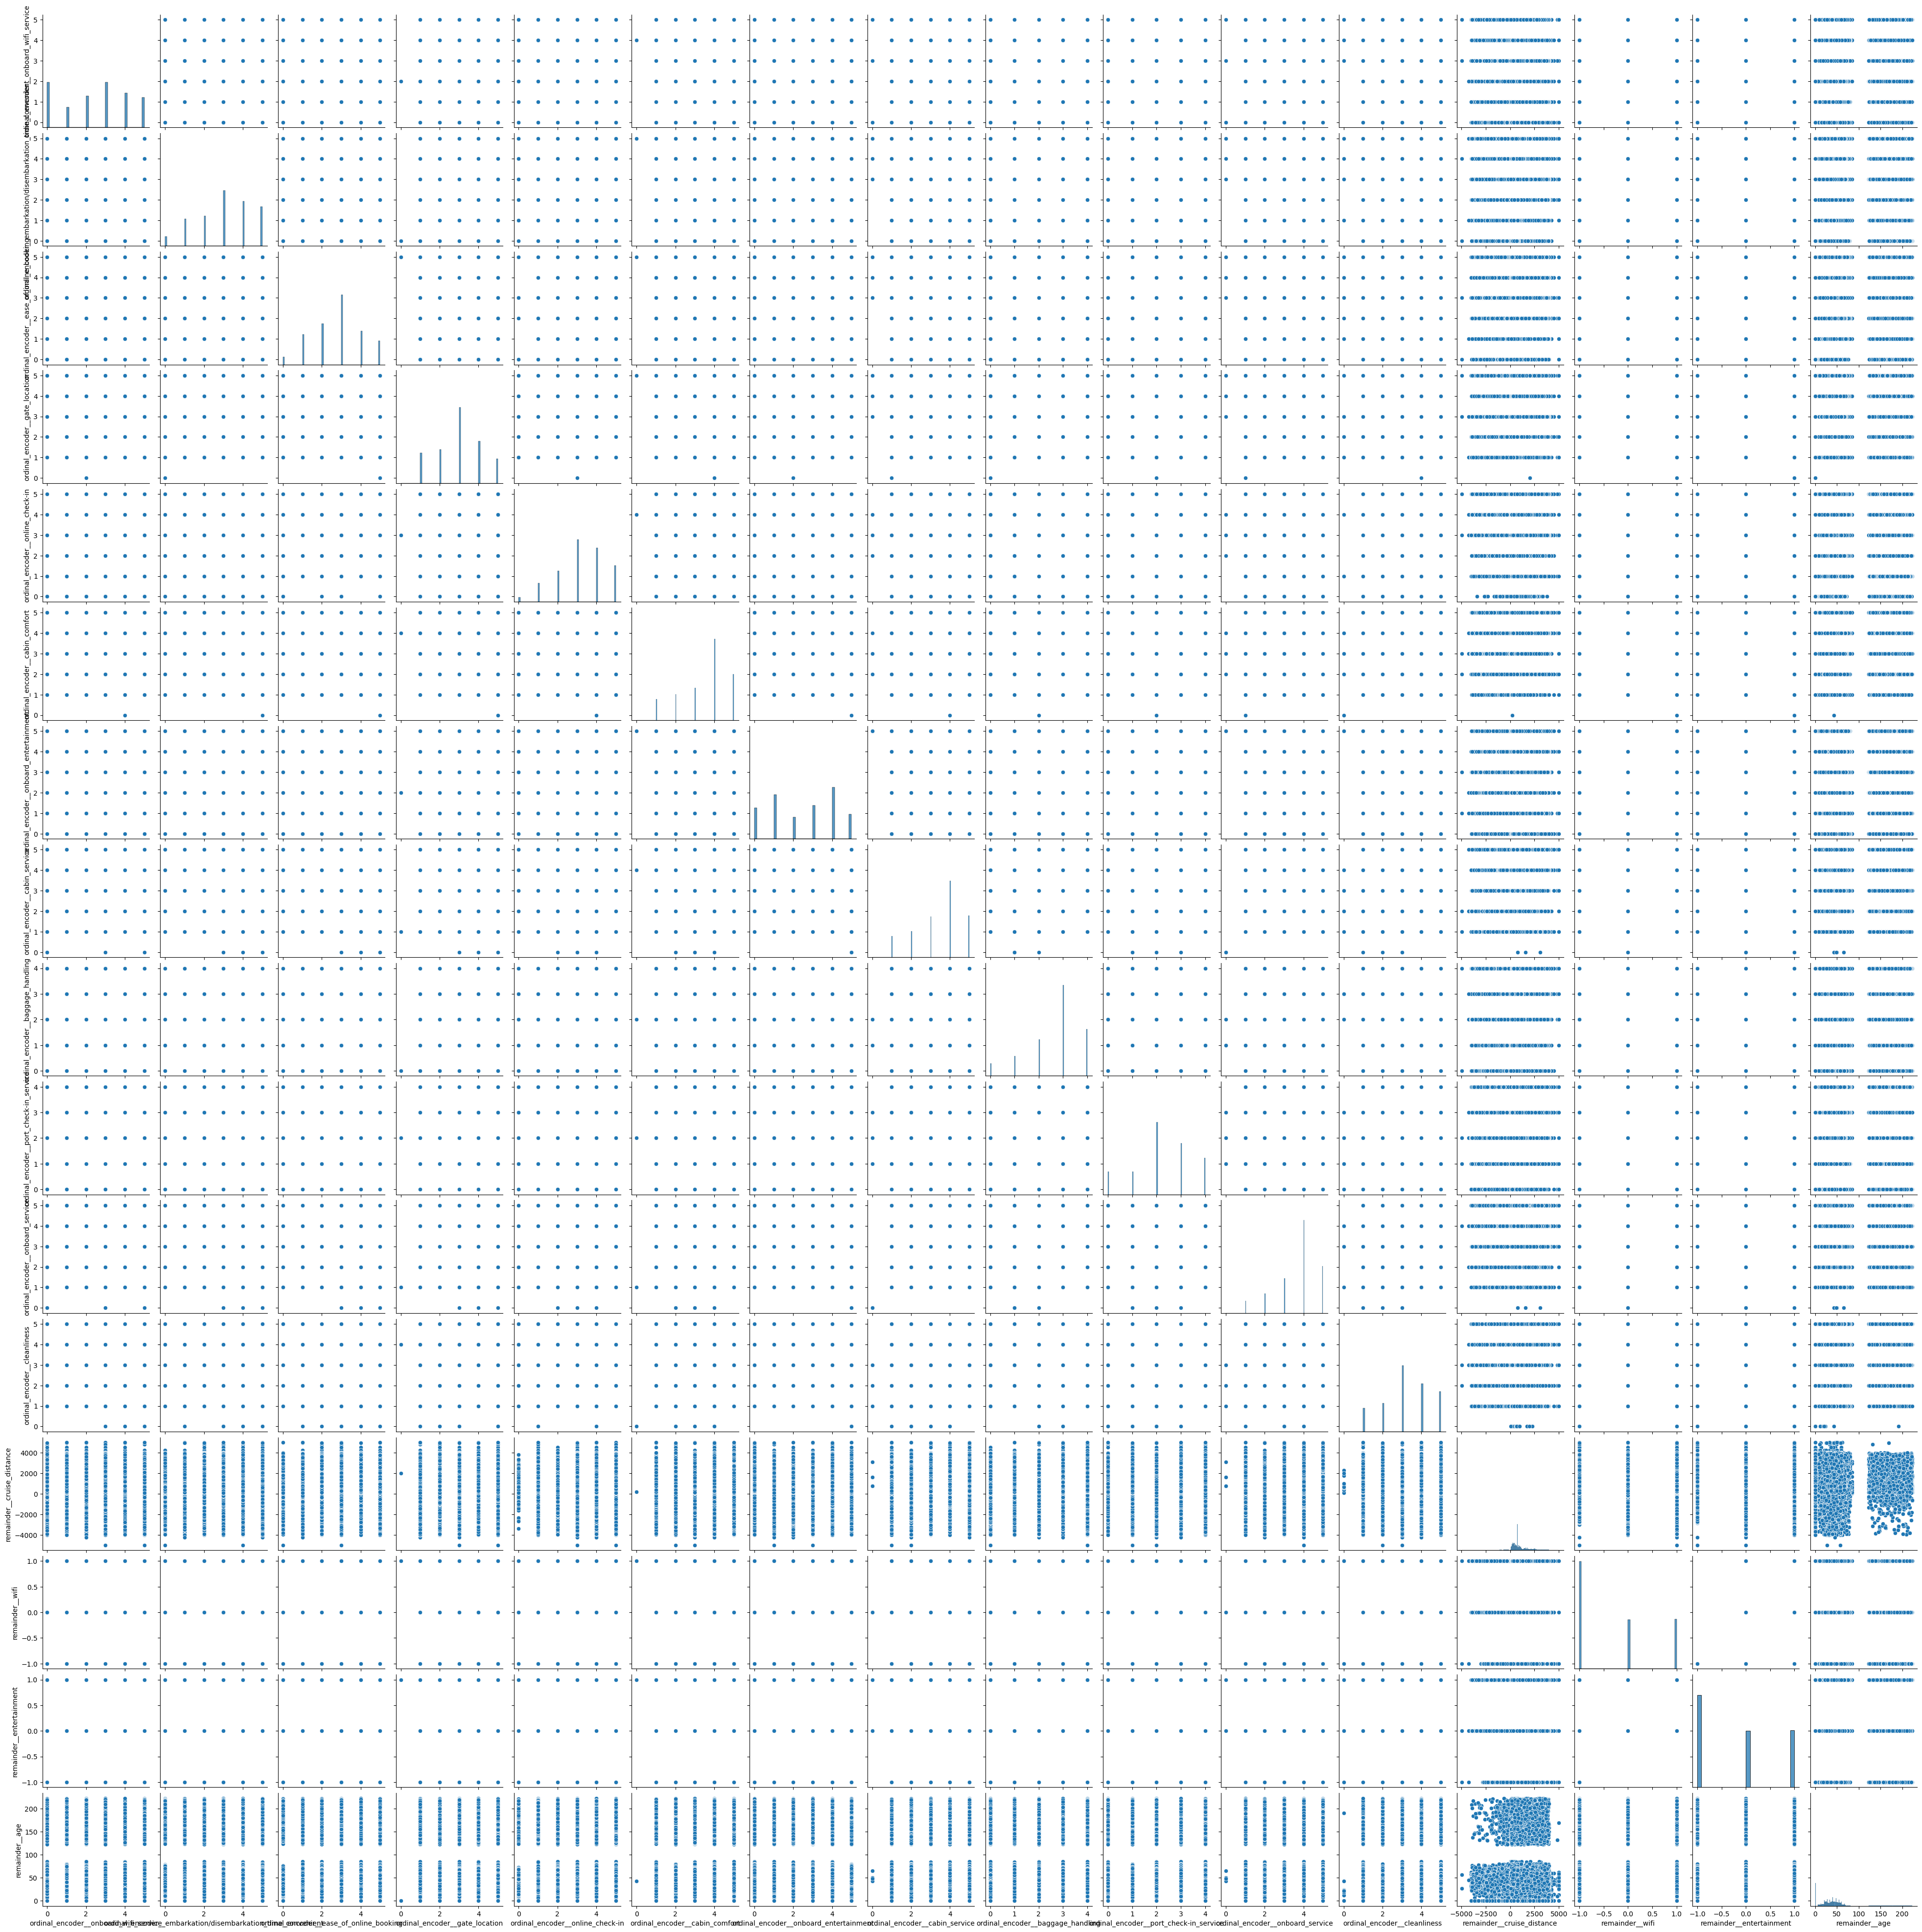

In [48]:
sns.pairplot(df_x[selected_columns])

<AxesSubplot:>

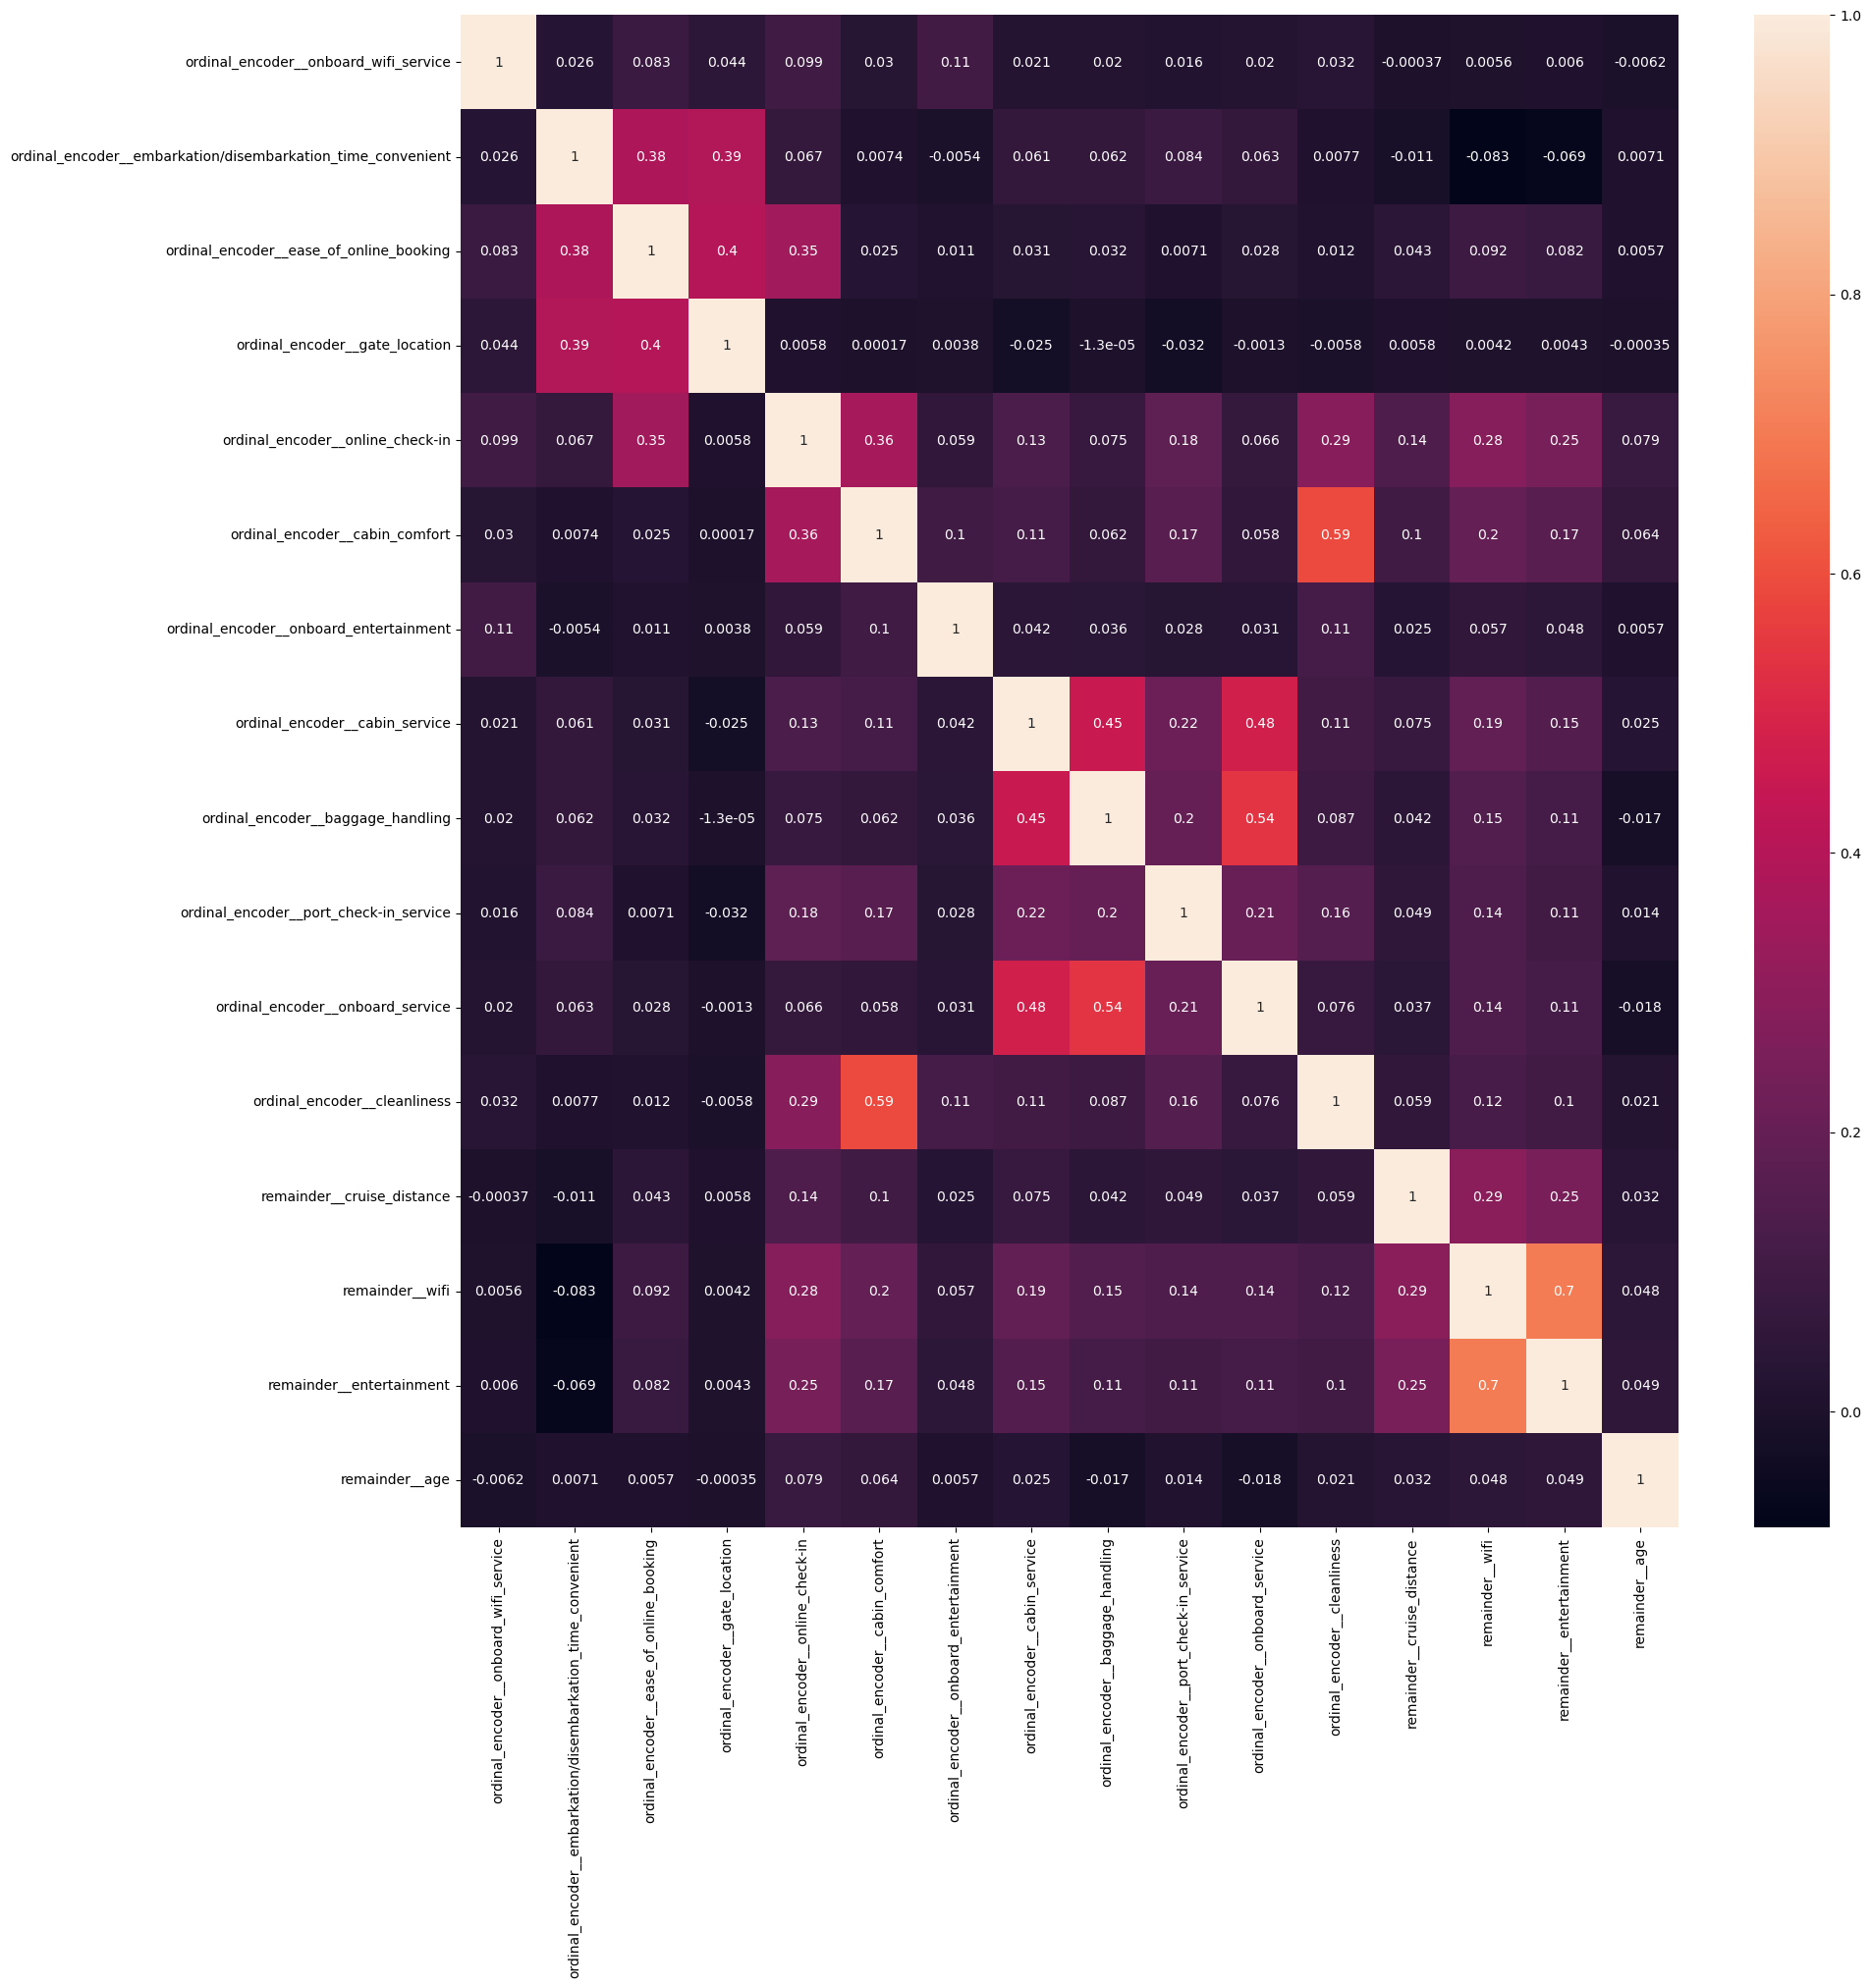

In [49]:
plt.figure(figsize=[20,20])
sns.heatmap(df_x[selected_columns].corr(),annot=True)

### findings
`pairplot` has no visually discernable correlations to pick up
`heatmap` has more correlation information:  
  
<b>Choosing correlations that are more than 0.28:<b>  
    
cabin_confort, online_check-in  .37  
cleanliness, online_check-in  .29  
cleanliness, cabin_comfort  .59  
cabin_service, baggage_handling .45    
cabin_service, onboard_service  .49  
baggage_hangling, onboard_service  .54  
  
  
<b>feature that is more correlated to target:<b>  
    
Wifi, ticket_type   
      
the correlations are not too strong to the poiont where dropping features is necessary.

# Useful Visualisations